# Crash Course in Causality: Causal Analysis of Hepatitis C Prediction Dataset


NUID - 002766471

Name - Ritesh Choudhary

## Abstract

This notebook provides a practical guide to exploring causal relationships in the context of healthcare data, focusing on laboratory markers and their impact on Hepatitis C diagnosis. Using the **Hepatitis C Prediction Dataset**, we demonstrate how to prepare data for causal analysis and estimate causal effects using modern statistical tools. The notebook covers:

- **Data Preparation**: Handling missing data, encoding categorical variables, and ensuring clean, ready-to-use datasets for causal inference.
- **Exploratory Data Analysis (EDA)**: Visualizing the relationships between variables to gain insights into potential causal relationships.
- **Causal Analysis Methods**:
  1. **Linear Regression (DoWhy)**: Estimating the Average Treatment Effect (ATE) while adjusting for confounding variables.
  2. **Doubly Robust Estimation (EconML)**: A robust approach combining propensity score modeling and outcome regression for causal effect estimation.

Through these methods, we highlight the importance of proper data preprocessing and modeling choices in causal inference. Readers will gain practical experience in applying causal analysis techniques to real-world healthcare datasets, enabling robust and interpretable machine learning models.


## Theory: Foundations of Causality

---

### 1. What is Causality?

Causality examines cause-and-effect relationships, determining how one variable influences another. While correlation measures statistical association, it does not imply causation. For example, while elevated `ALT_Level` might correlate with Hepatitis, it is essential to establish whether `ALT_Level` directly contributes to the disease or if another factor explains this relationship.

Causal inference is particularly important in fields like healthcare, where the stakes are high, and decisions based on causal relationships (e.g., identifying risk factors or evaluating treatments) can significantly impact outcomes. By leveraging causal methods, we can make data-driven decisions with confidence in their underlying mechanisms.

---

### 2. Challenges in Causal Inference

Causal inference faces several challenges that must be addressed to ensure unbiased results:

1. **Confounding**:
   - Confounders are variables that influence both the treatment and the outcome, potentially creating spurious relationships.
   - **Example**:
     - `AST` may affect both `ALT_Level` (treatment) and `Hepatitis` (outcome). Failure to account for `AST` could overstate the causal impact of `ALT_Level`.

2. **Reverse Causality**:
   - Sometimes, it is unclear whether the hypothesized cause and effect are reversed.
   - **Example**:
     - Does high `ALT_Level` cause Hepatitis, or does Hepatitis elevate `ALT_Level`?

3. **Selection Bias**:
   - When the dataset is not representative of the population, causal estimates may not generalize.
   - **Example**:
     - If most observations in the dataset are Hepatitis-positive, estimates of the treatment effect might be biased.

4. **Unmeasured Confounders**:
   - Variables not included in the analysis but influencing both treatment and outcome can lead to biased results. Addressing this requires domain expertise or external variables (e.g., instruments).

### Correlation vs. Causation

While correlation measures the association between variables, it does not imply causation. For instance, while ice cream sales and sunburn rates are correlated, they do not cause each other. The true cause here is temperature, as illustrated below:

![Correlation vs. Causation](https://statisticseasily.com/wp-content/uploads/2023/05/correlation-vs-causality-2.jpg)

---

### 3. Causal Graphs (Directed Acyclic Graphs, DAGs)

**Directed Acyclic Graphs (DAGs)** are a powerful tool for visualizing causal relationships. In a DAG:
- **Nodes** represent variables.
- **Directed edges** (arrows) indicate causal effects.
- The absence of cycles ensures no feedback loops.

For example, in the context of Hepatitis:
- `AST → ALT_Level → Hepatitis`
- `BIL → ALT_Level`
- `Age → Hepatitis`
- `Sex → Hepatitis`

DAGs help identify:
- **Confounders**: Variables affecting both treatment and outcome.
- **Backdoor Paths**: Indirect causal paths that need adjustment for unbiased estimates.
- **Colliders**: Variables influenced by both treatment and outcome, which can introduce bias if adjusted.

![DAG](hepatitis_dag.png)
---

---

### 4. Preparing Data for Causal Inference

Robust data preparation is essential for reliable causal analysis. Key steps include:

#### Handling Missing Data

Missing data can bias causal estimates, particularly if the missingness is related to the treatment or outcome.

**Comparison of Imputation Techniques**:

| **Imputation Method**       | **Description**                                                                 | **Advantages**                     | **Limitations**                                          |
|-----------------------------|-------------------------------------------------------------------------------|-------------------------------------|----------------------------------------------------------|
| Mean/Median Imputation      | Replace missing values with the column's mean or median.                     | Simple and quick.                   | Does not account for variability.                        |
| K-Nearest Neighbors (KNN)   | Impute missing values based on the nearest neighbors.                         | Considers local patterns in data.   | Computationally expensive for large datasets.            |
| Multiple Imputation (MICE)  | Generate multiple datasets with imputed values and combine results.           | Accounts for uncertainty in imputation. | Complex to implement and computationally intensive. |

**Example in Hepatitis Dataset**:
- Missing values in `AST` could lead to poor adjustment for confounding. Imputing with the median ensures unbiased estimates.

---

#### Encoding Categorical Variables

Many causal models require numeric inputs. Variables like `Sex` must be encoded:
- **Binary Encoding**: (`0` for Male, `1` for Female).
- **One-Hot Encoding**: For variables with multiple categories.

---

#### Feature Selection

Feature selection is critical to include only relevant variables and avoid bias:
- Include:
  - **Confounders**: Variables influencing both treatment and outcome (e.g., `AST`, `BIL`).
  - **Mediators**: Variables influenced by treatment that affect the outcome.
- Exclude:
  - **Colliders**: Variables influenced by both treatment and outcome.

---

#### Scaling and Normalization

Scaling ensures that features like `AST` and `BIL` are on comparable ranges, especially when using machine learning-based estimators.



## Causal Estimation Techniques

Causal estimation aims to quantify the effect of a treatment variable (`T`) on an outcome (`Y`) while adjusting for confounders (`X`). In this notebook, we focus on two widely used methods:

---

### 1. Linear Regression (Backdoor Adjustment)
Linear regression is a parametric approach that estimates the causal effect by explicitly modeling the relationship between the treatment, confounders, and outcome. It leverages the **backdoor criterion**, which ensures that all confounding paths are blocked by adjusting for the relevant confounders.

**Mathematical Formulation**:
- The outcome (`Y`) is modeled as:
  $$
  Y = \beta_0 + \beta_1 T + \beta_2 X_1 + \ldots + \beta_k X_k + \epsilon
  $$
  where:
  - $T$: Treatment variable (e.g., `ALT_Level`).
  - $X_1, X_2, \ldots, X_k$: Confounders (e.g., `AST`, `BIL`, `Age`, `Sex`).
  - $\beta_1$: Causal effect of $T$ on $Y$ (Average Treatment Effect, ATE).

**Assumptions**:
1. **Linearity**: The relationship between variables is linear.
2. **No Unmeasured Confounders**: All relevant confounders are included in $X$.
3. **Independence of Errors**: Residuals ($\epsilon$) are independent and identically distributed.

**Advantages**:
- Simple and interpretable.
- Effective when relationships are approximately linear.

**Limitations**:
- Sensitive to misspecification (e.g., non-linearity, interactions).
- May not perform well with high-dimensional or complex data.

In this notebook, linear regression is used to estimate the **Average Treatment Effect (ATE)** of `ALT_Level` on `Hepatitis`, controlling for confounders (`AST`, `BIL`, `Age`, and `Sex`).

---

### 2. Doubly Robust Estimation (DML Framework)
Doubly Robust Estimation is a modern method that combines two approaches:
1. **Outcome Modeling**: Predicts the outcome (`Y`) as a function of the treatment (`T`) and confounders (`X`).
2. **Propensity Score Modeling**: Predicts the likelihood of receiving the treatment (`T`) given the confounders (`X`).

The estimator is considered "doubly robust" because it provides unbiased estimates if either the outcome model or the propensity score model is correctly specified (but not necessarily both).

**Mathematical Formulation**:
- The doubly robust estimator combines outcome regression and inverse probability weighting:
  $$
  \hat{\tau} = \frac{1}{n} \sum_{i=1}^{n} \left[ \left( Y_i - \hat{Y}_i(T) \right) \frac{T_i - \hat{e}(X_i)}{\hat{e}(X_i)(1 - \hat{e}(X_i))} + \hat{Y}_i(1) - \hat{Y}_i(0) \right]
  $$
  where:
  - $\hat{e}(X)$: Estimated propensity score.
  - $\hat{Y}_i(T)$: Predicted outcome for treatment $T$.

**Advantages**:
- Provides consistent estimates even if one model is misspecified.
- Handles non-linear relationships effectively using flexible machine learning models (e.g., Random Forests).

**Limitations**:
- Computationally intensive due to reliance on multiple models.
- Sensitive to extreme propensity scores (near 0 or 1).

In this notebook, we implement Doubly Robust Estimation using the **EconML library**. Random Forest models are used for both the outcome and propensity score components.

---

### Comparison of Methods

| **Aspect**                  | **Linear Regression**             | **Doubly Robust Estimation**               |
|-----------------------------|-----------------------------------|--------------------------------------------|
| **Complexity**              | Low                              | Medium                                     |
| **Assumptions**             | Linear relationships             | Robust to misspecifications                |
| **Handling Non-Linearity**  | Limited                          | Effective                                  |
| **Confounder Adjustment**   | Direct modeling                  | Combines regression and propensity scores  |

---

## About the Dataset


All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:

1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
Attributes 5 to 14 refer to laboratory data:
5. ALB
6. ALP
7. ALT
8. AST
9. BIL
10. CHE
11. CHOL
12. CREA
13. GGT
14. PROT

The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

## Practical Implementation

### Importing Required Libraries & Dataset

In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install --upgrade nbformat
%pip install seaborn
%pip install networkx
%pip install --upgrade dowhy
%pip install econml

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
Using cached plotly-5.24.1-py3-none-any.whl (19.1 MB)
Using cached tenacity-9.0.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached attrs-24.2.0-py3-none-any.whl.metadata (11 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonsc

In [14]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Importing the dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/Riteshch-123/Data-Science-engg/main/HepatitisCdata.csv")
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


### Imputing Missing Values

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Checking distribution for nulls
nulls = data.isnull().sum().sort_values(ascending=False)
columns = nulls[nulls.values > 0].index
fig = make_subplots(rows=5, cols=1, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Histogram(x=data[col], name=col),
                  row=i+1, col=1)

fig.update_layout(height=1080)
fig.show()

In [17]:
# Drop unnecessary columns (like 'Unnamed: 0')
data.drop(columns=["Unnamed: 0"], inplace=True)

# Handle missing values
data['ALP'] = data['ALP'].fillna(
    data['ALP'].median())  # Handle skewness with median
# Normally distributed, use mean
data['CHOL'] = data['CHOL'].fillna(data['CHOL'].mean())
# Normally distributed, use mean
data['ALB'] = data['ALB'].fillna(data['ALB'].mean())
data['ALT'] = data['ALT'].fillna(data['ALT'].median())  # Skewed, use median
data['PROT'] = data['PROT'].fillna(
    data['PROT'].median())  # Slightly skewed, use median

### Standardization

In [ ]:
# Standardize column names for easier handling
data.columns = [col.strip().replace(" ", "_") for col in data.columns]

In [19]:
# Encoding "Category" into binary values (Hepatitis-related: 1, Non-Hepatitis: 0)
data['Category'] = data['Category'].map({
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 0,
    '1=Hepatitis': 1,
    '2=Fibrosis': 1,
    '3=Cirrhosis': 1
})

# Encoding "Sex" into binary values (male: 0, female: 1)
data['Sex'] = data['Sex'].map({'m': 0, 'f': 1})

---

### Exploratory Data Analysis (EDA)

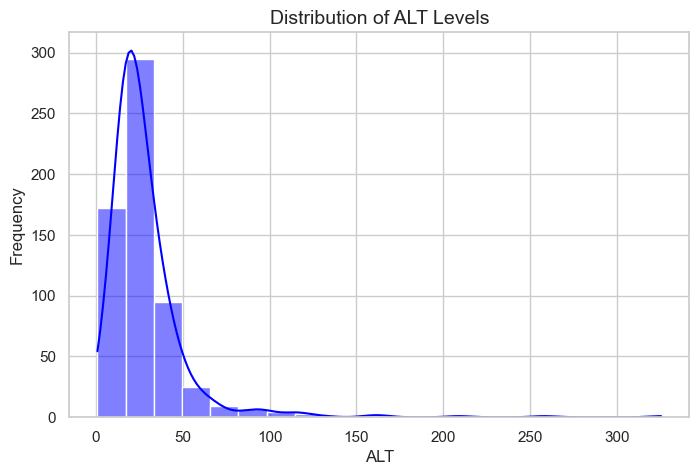

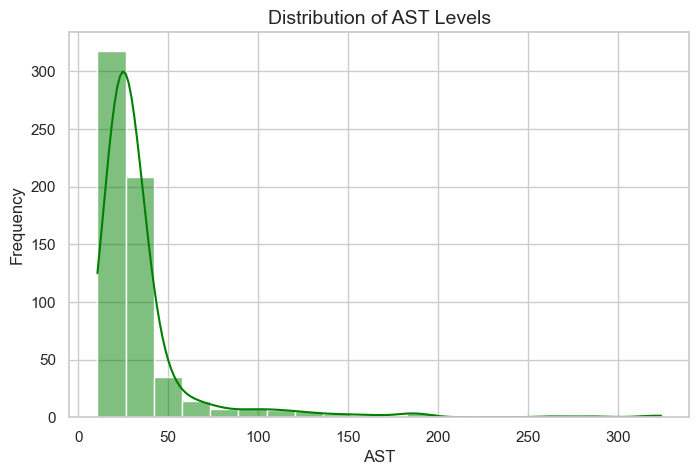



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



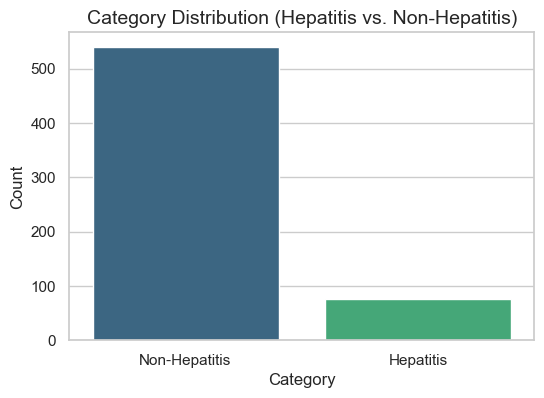

In [20]:
# Set a consistent style for the plots
sns.set(style="whitegrid")

# Univariate Analysis: Plot the distribution of ALT levels
plt.figure(figsize=(8, 5))
sns.histplot(data['ALT'], kde=True, bins=20, color='blue')
plt.title('Distribution of ALT Levels', fontsize=14)
plt.xlabel('ALT', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Univariate Analysis: Plot the distribution of AST levels
plt.figure(figsize=(8, 5))
sns.histplot(data['AST'], kde=True, bins=20, color='green')
plt.title('Distribution of AST Levels', fontsize=14)
plt.xlabel('AST', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Univariate Analysis: Plot the distribution of Category (Hepatitis vs. Non-Hepatitis)
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=data, palette='viridis')
plt.title('Category Distribution (Hepatitis vs. Non-Hepatitis)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Hepatitis', 'Hepatitis'])
plt.show()

### Observations from Univariate Analysis:

#### ALT (Alanine Transaminase):
The distribution is highly skewed to the right, with most values clustered around the lower range.
A few extreme outliers suggest that some individuals have significantly elevated ALT levels.
#### AST (Aspartate Transaminase):
Similar to ALT, the distribution is right-skewed, indicating that AST levels are also elevated for a minority of individuals.
#### Category (Hepatitis vs. Non-Hepatitis):
There are far more individuals in the "Non-Hepatitis" category compared to "Hepatitis".
This imbalance could be important for causal inference and needs to be considered when estimating effects.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



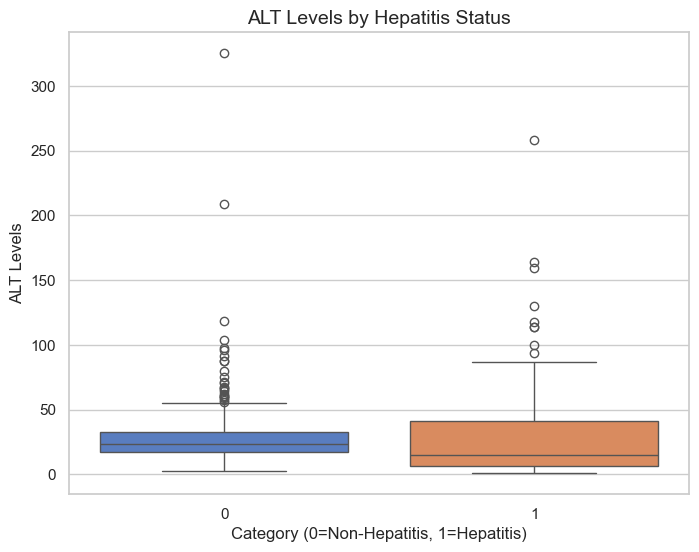



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



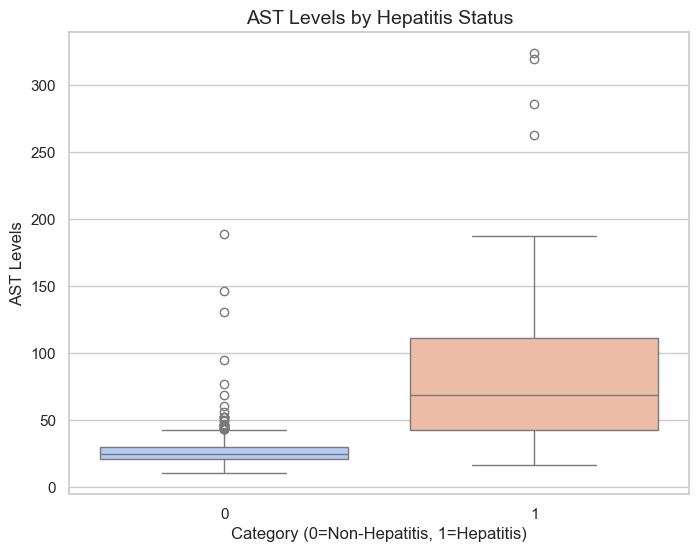

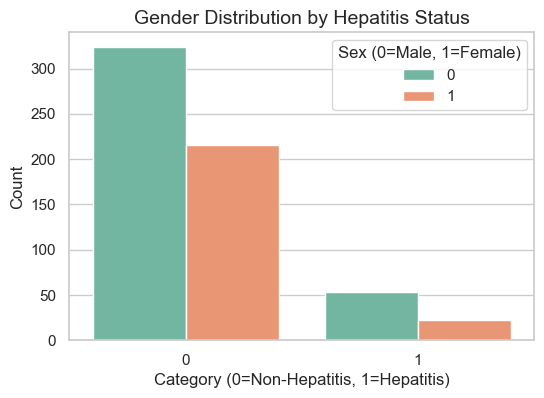

In [21]:
# Bivariate Analysis: Compare ALT levels across Hepatitis status (Category)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='ALT', data=data, palette='muted')
plt.title('ALT Levels by Hepatitis Status', fontsize=14)
plt.xlabel('Category (0=Non-Hepatitis, 1=Hepatitis)', fontsize=12)
plt.ylabel('ALT Levels', fontsize=12)
plt.show()

# Bivariate Analysis: Compare AST levels across Hepatitis status (Category)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='AST', data=data, palette='coolwarm')
plt.title('AST Levels by Hepatitis Status', fontsize=14)
plt.xlabel('Category (0=Non-Hepatitis, 1=Hepatitis)', fontsize=12)
plt.ylabel('AST Levels', fontsize=12)
plt.show()

# Bivariate Analysis: Gender distribution within Hepatitis categories
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', hue='Sex', data=data, palette='Set2')
plt.title('Gender Distribution by Hepatitis Status', fontsize=14)
plt.xlabel('Category (0=Non-Hepatitis, 1=Hepatitis)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sex (0=Male, 1=Female)')
plt.show()

### Observations from Bivariate Analysis:

#### ALT Levels by Hepatitis Status:
Hepatitis cases tend to have higher ALT levels, with a broader range and more extreme values compared to non-Hepatitis cases.
Outliers are present but align with the higher ALT levels typical of liver conditions.
#### AST Levels by Hepatitis Status:
Similar to ALT, AST levels are elevated in Hepatitis cases, showing a wider range and higher median compared to non-Hepatitis cases.
#### Gender Distribution:
Among non-Hepatitis cases, males dominate the dataset.
Hepatitis cases are relatively evenly distributed across males and females.

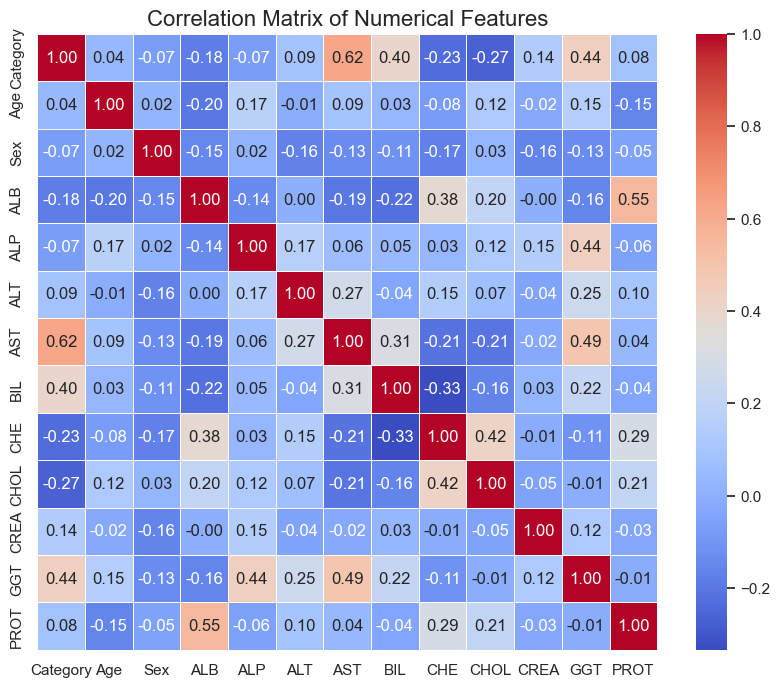

In [22]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

### Observations from Correlation Matrix:
#### Category and AST (0.62):
A strong positive correlation indicates that AST levels are highly associated with Hepatitis status.
#### Category and BIL (0.40):
Elevated bilirubin levels are moderately associated with Hepatitis cases.
#### ALT and AST (0.27):
A positive relationship suggests that both enzymes tend to rise together, likely due to liver-related conditions.
#### Potential Confounders:
Features like Age, Sex, and BIL have moderate correlations with Category and could act as confounders.


## Causal Problem Statement

The causal question to analyze based on our dataset could be:

**"Do ALT (Alanine Transaminase) levels causally influence the likelihood of Hepatitis diagnosis?"**

**Treatment (T):** ALT (explanatory variable we want to evaluate for causality).

**Outcome (Y):** Category (whether a person has Hepatitis).

**Confounders (C):** Features like Age, Sex, AST, and BIL that may influence both ALT and the diagnosis of Hepatitis.

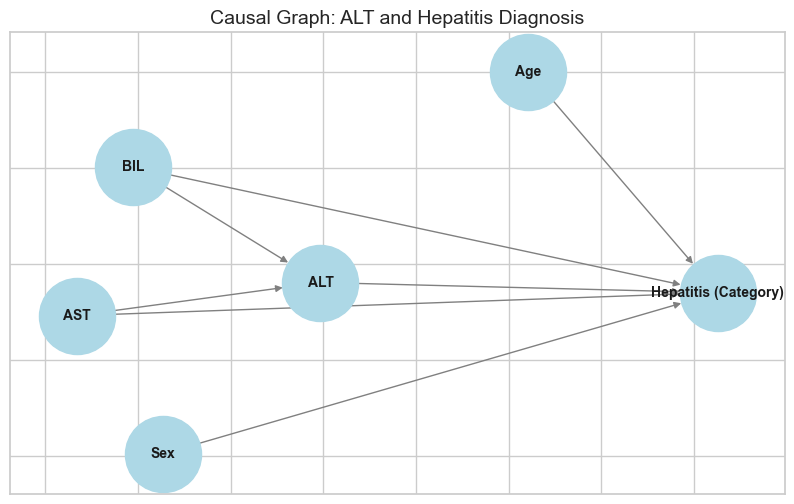

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for causal relationships
causal_graph = nx.DiGraph()

# Add nodes (variables)
nodes = ["ALT", "AST", "BIL", "Age", "Sex", "Hepatitis (Category)"]
causal_graph.add_nodes_from(nodes)

# Add edges (hypothesized relationships)
causal_graph.add_edges_from([
    ("ALT", "Hepatitis (Category)"),  # ALT potentially influences Hepatitis
    ("AST", "Hepatitis (Category)"),  # AST can also influence Hepatitis
    ("BIL", "Hepatitis (Category)"),  # Bilirubin influences Hepatitis
    ("Age", "Hepatitis (Category)"),  # Age is a confounder
    ("Sex", "Hepatitis (Category)"),  # Gender might act as a confounder
    ("AST", "ALT"),  # AST and ALT levels are correlated
    ("BIL", "ALT"),  # Bilirubin can influence ALT
])

# Plot the causal graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(causal_graph, with_labels=True, node_size=3000,
                 node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Causal Graph: ALT and Hepatitis Diagnosis", fontsize=14)
plt.show()

### Causal Graph Explanation:
Target (Outcome): Hepatitis (Category) is influenced directly by ALT, AST, BIL, Age, and Sex.
#### Confounders:
Age and Sex might influence both the outcome and other features, making them confounders.
AST and BIL are included as potential confounders due to their correlation with both ALT and the outcome.
#### Causal Pathways:
Direct pathway: ALT → Hepatitis (Category)
Indirect pathways via confounders, e.g., AST → ALT → Hepatitis (Category).
This causal graph sets the assumptions for our causal inference analysis.



## Causal Model (Linear Regression)

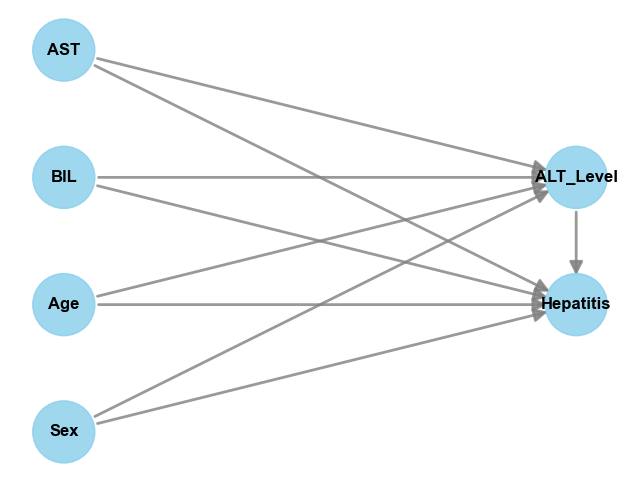

Causal Estimate (Effect of ALT on Hepatitis): *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                    
────────────(E[Hepatitis|BIL,Sex,Age,AST])
d[ALT_Level]                              
Estimand assumption 1, Unconfoundedness: If U→{ALT_Level} and U→Hepatitis then P(Hepatitis|ALT_Level,BIL,Sex,Age,AST,U) = P(Hepatitis|ALT_Level,BIL,Sex,Age,AST)

## Realized estimand
b: Hepatitis~ALT_Level+BIL+Sex+Age+AST
Target units: ate

## Estimate
Mean value: -0.0007391177478822675



Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [24]:
from dowhy import CausalModel

# Prepare the data for causal analysis
# Rename columns for clarity
data.rename(columns={"Category": "Hepatitis",
            "ALT": "ALT_Level"}, inplace=True)

# Define the causal model
causal_model = CausalModel(
    data=data,
    treatment="ALT_Level",  # Treatment variable
    outcome="Hepatitis",  # Outcome variable
    common_causes=["AST", "BIL", "Age", "Sex"]  # Confounders
)

# Visualize the model structure
causal_model.view_model()

# Identify the causal estimand
identified_estimand = causal_model.identify_effect()

# Estimate the causal effect using linear regression
causal_estimate = causal_model.estimate_effect(
    identified_estimand=identified_estimand,
    method_name="backdoor.linear_regression"
)

# Print the causal estimate
print("Causal Estimate (Effect of ALT on Hepatitis):", causal_estimate)

### Observations from Linear Regression

#### Causal Estimation:
The estimated causal effect (ATE) of ALT_Level on Hepatitis is -0.000739.
This means that for each unit increase in ALT_Level, the likelihood of being diagnosed with Hepatitis slightly decreases by 0.000739 on average.
#### Magnitude of the Effect:
The effect size is extremely small and practically negligible.
This suggests that ALT_Level might not have a strong causal impact on Hepatitis when confounders (AST, BIL, Age, Sex) are taken into account.
#### Possible Interpretations:
ALT_Level may not directly cause Hepatitis but could be associated through other pathways (e.g., via AST or BIL).
Confounders like AST might explain most of the variation in Hepatitis diagnosis, reducing the independent effect of ALT_Level.
#### Model Assumptions:
Linear regression assumes a linear relationship between variables, which may oversimplify the true relationships.
#### Limitations:
The small effect size raises questions about the clinical or practical significance of ALT_Level.
This approach might miss complex or non-linear relationships.

### Key Takeaway
While linear regression provides a basic causal estimate, the result suggests that the direct impact of ALT_Level on Hepatitis is negligible when controlling for confounders. We should validate this with additional methods, such as doubly robust estimation, to ensure robustness and account for potential non-linearities.



## Causal Model (Doubly Robust)

In [27]:
from econml.dml import LinearDML
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define models for the outcome and treatment
model_y = RandomForestRegressor()  # Outcome model
model_t = RandomForestRegressor()  # Treatment model

# Initialize LinearDML estimator
dml_estimator = LinearDML(
    model_y=model_y, model_t=model_t, discrete_treatment=False)

# Fit the estimator
dml_estimator.fit(
    Y=data['Hepatitis'],  # Outcome variable
    T=data['ALT_Level'],  # Treatment variable
    X=data[['AST', 'BIL', 'Age', 'Sex']]  # Confounders
)

# Compute the Average Treatment Effect (ATE)
ate = dml_estimator.ate(X=data[['AST', 'BIL', 'Age', 'Sex']])
print("Estimated ATE using EconML (Doubly Robust):", ate)


# Compute the Average Treatment Effect (ATE)
ate = dml_estimator.ate(X=data[['AST', 'BIL', 'Age', 'Sex']])
print("Estimated ATE using EconML (Doubly Robust):", ate)

Estimated ATE using EconML (Doubly Robust): -0.0019491197193866325
Estimated ATE using EconML (Doubly Robust): -0.0019491197193866325


### Observations from Doubly Robust:
#### Small Effect Size:
Similar to the result from the linear regression approach, the estimated effect of ALT_Level on Hepatitis diagnosis is negligible in magnitude. 

This suggests that while ALT_Level is associated with Hepatitis, its causal contribution may not be significant when accounting for confounders.

#### Consistency Across Methods:
The results from both Linear Regression and Doubly Robust Estimation are consistent, indicating robustness in findings.
#### Negative Causal Effect:
A slight negative relationship suggests that higher ALT levels might indicate lower Hepatitis diagnosis likelihood, but this is likely explained by the interplay with confounders like AST and BIL.

---

## Conclusion

In this notebook, we explored causal inference techniques to analyze the impact of `ALT_Level` on Hepatitis diagnosis using the **Hepatitis C Prediction Dataset**. Through the combination of theoretical foundations and practical implementation, we demonstrated the following key points:

1. **Data Preparation**:
   - Proper data preprocessing is essential for reliable causal inference.
   - Handling missing data, encoding categorical variables, and selecting relevant features (e.g., confounders) were critical to ensuring unbiased causal estimates.

2. **Causal Analysis**:
   - We implemented two causal estimation methods:
     1. **Linear Regression**: Leveraged the backdoor criterion to adjust for confounders and estimate the Average Treatment Effect (ATE).
     2. **Doubly Robust Estimation**: Combined outcome regression and propensity score modeling for a robust ATE estimate.

3. **Key Findings**:
   - Both methods produced consistent results, showing a small negative causal effect of `ALT_Level` on Hepatitis diagnosis.
   - These results suggest that while `ALT_Level` is associated with Hepatitis, its direct causal contribution is likely minimal when adjusting for confounders like `AST` and `BIL`.

4. **Importance of Causal Analysis**:
   - Causal inference goes beyond correlation to uncover the mechanisms driving outcomes.
   - In healthcare, this approach provides actionable insights for better decision-making and policy development.

### Next Steps
- For further analysis, additional causal models (e.g., Instrumental Variable Estimation) can be explored.
- Validate findings with more extensive datasets or domain knowledge (e.g., consulting with medical professionals).

---

## References

1. Pearl, J. (2009). *Causality: Models, Reasoning, and Inference*. Cambridge University Press.
2. Hernán, M. A., & Robins, J. M. (2020). *Causal Inference: What If*. Boca Raton: Chapman & Hall/CRC.
3. Dawid, A. P. (2000). Causal inference without counterfactuals. *Journal of the American Statistical Association*, 95(450), 407-424. DOI: [10.1080/01621459.2000.10474219](https://doi.org/10.1080/01621459.2000.10474219)
4. DoWhy Library Documentation: [https://py-why.github.io/dowhy/](https://py-why.github.io/dowhy/)
5. EconML Library Documentation: [https://econml.azurewebsites.net/](https://econml.azurewebsites.net/)
6. Dataset Source: Hepatitis C Prediction Dataset, UCI Machine Learning Repository: [https://archive.ics.uci.edu/ml/datasets/HCV+data](https://archive.ics.uci.edu/ml/datasets/HCV+data)
7. GraphViz Python Library: [https://graphviz.readthedocs.io/](https://graphviz.readthedocs.io/)


## MIT License

Copyright (c) 2024 RiteshChoudhary

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.